In [2]:
#Exploratory Data Analysis
#Data Preprocessing
#Designing your Model
#Check Model Acurracy with variance and bias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model as LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv("../Datasets/loan_data.csv")
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
person_gender_dummy = pd.get_dummies(data['person_education'], drop_first= True, dtype= np.int64)
person_home_ownership_dummy = pd.get_dummies(data['person_home_ownership'], drop_first= True, dtype= np.int64)
loan_intent_dummy = pd.get_dummies(data['loan_intent'], drop_first= True, dtype= np.int64)

data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].replace("Yes", 1).replace("No", 0)

x = data.join(other= person_gender_dummy).join(other= person_home_ownership_dummy).join(other= loan_intent_dummy)

x = x.loc[:, ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
              'credit_score', 'Bachelor', 'Doctorate', 'High School', 'Master', 'OTHER', 'OWN', 'RENT', 
              'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'previous_loan_defaults_on_file']] 
y = data["loan_status"]

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  float64
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  float64
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  float64
 7   credit_score                    45000 non-null  int64  
 8   Bachelor                        45000 non-null  int64  
 9   Doctorate                       45000 non-null  int64  
 10  High School                     45000 non-null  int64  
 11  Master                          45000 non-null  int64  
 12  OTHER                           

<Axes: >

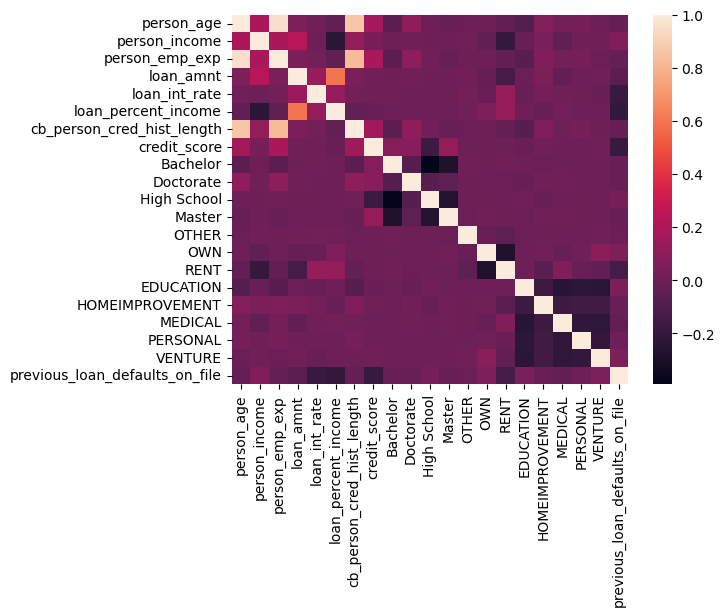

In [8]:
sns.heatmap(x.corr())

In [14]:
#Parameter Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

scaler = StandardScaler()
x_train = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size= 0.3)

kf = KFold(n_splits= 8, shuffle= True, random_state= 42)
param_grid= {"n_neighbors": np.arange(1, 20, 10)}

k_nn = KNeighborsClassifier()
k_nn_searchCV = RandomizedSearchCV(k_nn, param_grid, cv= kf, n_iter=2)

k_nn_searchCV.fit(x_train, y_train)
print(f"best params: {k_nn_searchCV.best_params_}\nscore: {k_nn_searchCV.best_score_}")

best params: {'n_neighbors': 11}
score: 0.8404762806224444


In [15]:
print(f"accuracy using .score_: {k_nn_searchCV.score(x_test, y_test)}")

accuracy using .score_: 0.8338518518518518


In [11]:
y_pred_probs = k_nn_searchCV.predict_proba(x_test)[:, 1]
yhat = np.where(y_pred_probs >= 0.5, 1, 0)

accuracy = np.mean(yhat == y_test)
print(f"accuracy using manual accuracy: {accuracy}")

accuracy using manual accuracy: 0.8408148148148148


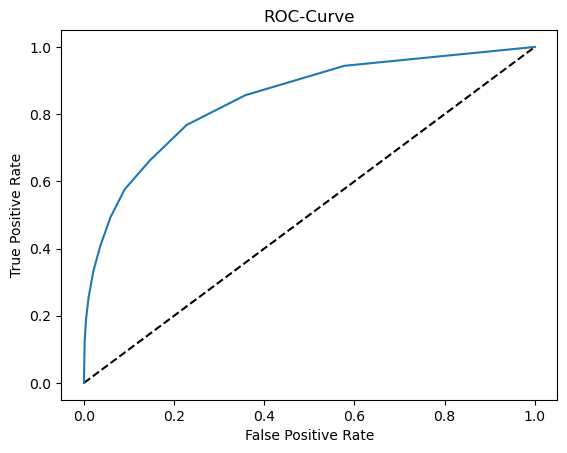

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve")
plt.show()

In [ ]:
roc_auc_score(y_test, predictions)

In [ ]:
#Viewing and analysing the confusion Matrix
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= np.unique(y_test))
disp.plot(cmap= "magma")

plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Analysis Precision and Recall
print(f"{classification_report(y_test, yhat)}")